# Proyek Analisis Data: E-Commerce Public Dataset
* Nama:Nugroho Adi Wirapratama
* Email:adiwira009@gmail.com
* Id Dicoding:adiwira

# Pertanyaan Bisnis
1. Kategori product apakah yang paling banyak di order secara quantity? (delivered)
2. Tipe payment apa yang paling banyak digunakan?
3. Bagaimana tren approved product yang terjual?
4. Bagaimana persebaran customer dan seller?
5. Kategori product apakah yang memiliki review score tertinggi?

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
# import dataset from Google Drive
with open('/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv','r') as orders:
  orders = pd.read_csv(orders)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv','r') as order_items:
  order_items = pd.read_csv(order_items)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv','r') as order_payments:
  order_payments = pd.read_csv(order_payments)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv','r') as order_reviews:
  order_reviews = pd.read_csv(order_reviews)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv','r') as products:
  products = pd.read_csv(products)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv','r') as product_category_name_translation:
  product_category_name_translation = pd.read_csv(product_category_name_translation)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv','r') as customers:
  customers = pd.read_csv(customers)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv','r') as sellers:
  sellers = pd.read_csv(sellers)
with open('/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv','r') as geolocation:
  geolocation = pd.read_csv(geolocation)

# Preprocessing Data

## Duplikat value

#### orders

In [ ]:
orders.duplicated().sum()

0

In [ ]:
order_items.duplicated(subset='order_id').sum()

13984

In [ ]:
order_payments.duplicated(subset='order_id').sum()

4446

In [ ]:
order_reviews.duplicated(subset='order_id').sum()

551

#### products

In [ ]:
products.duplicated(subset='product_id').sum()

0

In [ ]:
product_category_name_translation.duplicated(subset='product_category_name').sum()

0

#### -

In [ ]:
customers.duplicated(subset='customer_id').sum()

0

In [ ]:
sellers.duplicated(subset='seller_id').sum()

0

In [ ]:
geolocation.duplicated(subset='geolocation_zip_code_prefix').sum()

981148

Menghapus baris baris yang duplikat sesuai antara dataset dengan subset
* order_items, order_payments, order_reviews = order_id
* geolocation = geolocation_zip_code_prefix

## Null value

#### orders

In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### products

In [ ]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### -

In [ ]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

ada null value pada data products di product_category_name isi null value dengan -

In [ ]:
# handling duplikat
order_items = order_items.drop_duplicates(subset='order_id')
order_payments = order_payments.drop_duplicates(subset='order_id')
order_reviews = order_reviews.drop_duplicates(subset='order_id')
geolocation = geolocation.drop_duplicates(subset='geolocation_zip_code_prefix')

# handling null value
products['product_category_name'].fillna('-', inplace=True)

## Merge data

### merge orders dengan order_items, order_payments, order_reviews

In [ ]:
# ambil kolom yang hanya diinginkan
orders = orders[['order_id','customer_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']]
order_reviews = order_reviews[['order_id','review_score']]
order_payments = order_payments[['order_id','payment_type','payment_value']]
order_items = order_items[['order_id','product_id','seller_id','price','freight_value']]

In [ ]:
# merge orders dengan order_reviews
orders = pd.merge(orders, order_reviews, on='order_id', how='left').drop_duplicates(subset=['customer_id'])

# merge orders dengan order_payment
orders = pd.merge(orders, order_payments, on='order_id', how='left').drop_duplicates(subset=['order_id'])

# merge orders dengan order_items
orders = pd.merge(orders, order_items, on='order_id', how='left').drop_duplicates(subset=['order_id']).reset_index(drop=True)

### products dengan product_category_name_translation

In [ ]:
# ambil kolom yang hanya diinginkan
products = products[['product_id','product_category_name','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

# merge products dengan product_category_name_translation
products = pd.merge(products, product_category_name_translation, on="product_category_name", how='left')

## Overview dataset

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,review_score,payment_type,payment_value,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,4.0,credit_card,18.12,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,4.0,boleto,141.46,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,5.0,credit_card,179.12,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,5.0,credit_card,72.20,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,5.0,credit_card,28.62,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [ ]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0,housewares


In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


## Info dataset



In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_approved_at              99281 non-null  object 
 4   order_delivered_carrier_date   97658 non-null  object 
 5   order_delivered_customer_date  96476 non-null  object 
 6   review_score                   98673 non-null  float64
 7   payment_type                   99440 non-null  object 
 8   payment_value                  99440 non-null  float64
 9   product_id                     98666 non-null  object 
 10  seller_id                      98666 non-null  object 
 11  price                          98666 non-null  float64
 12  freight_value                  98666 non-null 

In [ ]:
orders.payment_type.value_counts()

credit_card    75387
boleto         19784
voucher         2739
debit_card      1527
not_defined        3
Name: payment_type, dtype: int64

* order_approved_at masih object
* order_delivered_carrier_date masih object
* order_delivered_customer_date masih object
* ada not_defined pada payment_type

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32951 non-null  object 
 2   product_weight_g               32949 non-null  float64
 3   product_length_cm              32949 non-null  float64
 4   product_height_cm              32949 non-null  float64
 5   product_width_cm               32949 non-null  float64
 6   product_category_name_english  32328 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.0+ MB


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19015 entries, 0 to 999846
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


### convert tipe data dan remove data

In [ ]:
# convert ke date
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at']).dt.date
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date']).dt.date
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date']).dt.date

# remove baris not_defined
orders=orders[orders.payment_type != 'not_defined']

In [ ]:
# # Eskport Dataset
# orders.to_csv('orders.csv', index=False)
# products.to_csv('products.csv', index=False)
# customers.to_csv('customers.csv', index=False)
# sellers.to_csv('sellers.csv', index=False)
# geolocation.to_csv('geolocation.csv', index=False)

# Visualization & Explanatory Analysis
akan menjawab dari pertanyaan bisnis

## Pertanyaan 1: Kategori product apakah yang paling banyak di order secara quantity? (delivered)


In [ ]:
# mengambil product delivered (sudah terkirim)
order_success = orders[['product_id','order_status']][orders['order_status'] == 'delivered']

In [ ]:
group_order_success = pd.merge(products[['product_id', 'product_category_name_english']], order_success, on="product_id", how='inner') #.sort_values(by='jumlah', ascending=False)
group_order_success = group_order_success.groupby('product_category_name_english').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False).head(10)
group_order_success

,product_category_name_english,jumlah
7,bed_bath_table,9167
43,health_beauty,8608
65,sports_leisure,7491
15,computers_accessories,6501
39,furniture_decor,6213
49,housewares,5688
70,watches_gifts,5472
68,telephony,4076
5,auto,3793
69,toys,3779


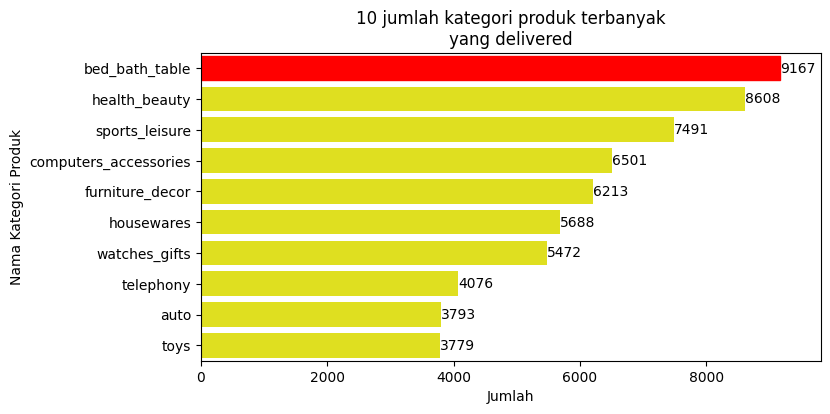

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='jumlah', y='product_category_name_english', data=group_order_success.sort_values(by='jumlah', ascending=True), color='yellow')

# Menambahkan nilai di atas setiap batang
for i,p in enumerate(ax.patches):
  width = p.get_width()
  plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', va='center')

  # Memberikan warna berbeda untuk kategori dengan review_score paling atas
  if i == len(ax.patches) - 1:
    p.set_color('red')  # Atur warna kategori teratas menjadi merah

plt.margins(x=0.07)

# Menambahkan label dan judul
plt.xlabel('Jumlah')
plt.ylabel('Nama Kategori Produk')
plt.title('10 jumlah kategori produk terbanyak\nyang delivered')

# Memutar sumbu y
plt.gca().invert_yaxis()

# Menampilkan plot
plt.show()

## Pertanyaan 2: Tipe payment apa yang paling banyak digunakan?


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,review_score,payment_type,payment_value,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,4.0,credit_card,18.12,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26,2018-07-26,2018-08-07,4.0,boleto,141.46,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-17,5.0,credit_card,179.12,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-22,2017-12-02,5.0,credit_card,72.20,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-14,2018-02-16,5.0,credit_card,28.62,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [ ]:
group_payment = orders.groupby('payment_type').agg({'order_id': 'count'}).reset_index()

In [ ]:
group_payment

,payment_type,order_id
0,boleto,19784
1,credit_card,75387
2,debit_card,1527
3,voucher,2739


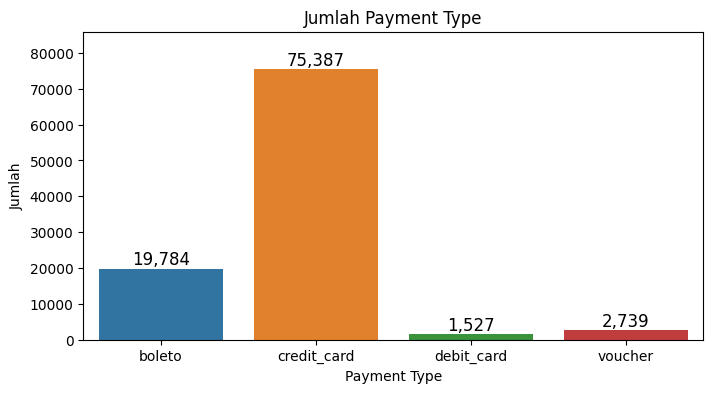

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='payment_type', y='order_id', data=group_payment)

# Menambahkan nilai di atas setiap batang
for bar in ax.patches:
    bar_value = int(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

# Bagian atas diberi ruang dengan margin
plt.margins(y=0.14)

# Menambahkan label dan judul
plt.xlabel('Payment Type')
plt.ylabel('Jumlah')
plt.title('Jumlah Payment Type')

# Menampilkan plot
plt.show()

## Pertanyaan 3: Bagaimana tren approved product yang terjual?



In [ ]:
group_order_approved = orders.groupby('order_approved_at').agg({'order_id': 'count'}).reset_index()
group_order_approved['order_approved_at'] = pd.to_datetime(group_order_approved['order_approved_at'], format='%Y-%m-%d')
group_order_approved['year'] = group_order_approved['order_approved_at'].dt.year
group_order_approved['month'] = group_order_approved['order_approved_at'].dt.month

In [ ]:
group_order_approved

,order_approved_at,order_id,year,month
0,2016-09-15,1,2016,9
1,2016-10-04,20,2016,10
2,2016-10-05,11,2016,10
3,2016-10-06,110,2016,10
4,2016-10-07,59,2016,10
...,...,...,...,...
606,2018-08-26,70,2018,8
607,2018-08-27,64,2018,8
608,2018-08-28,56,2018,8
609,2018-08-29,15,2018,8


### 2016

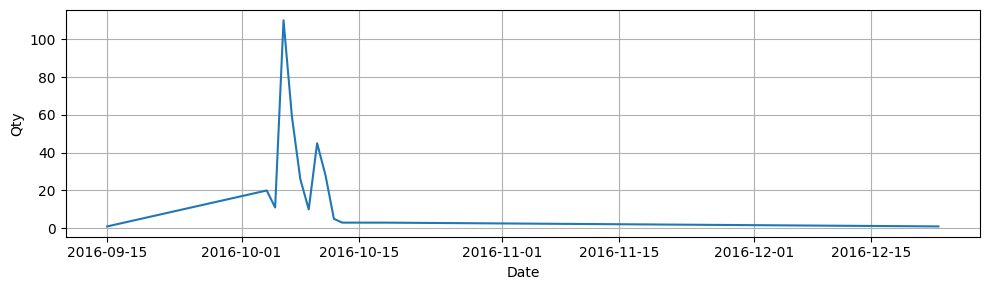

In [ ]:
plt.figure(figsize=(10, 3))  # Ukuran gambar (opsional)
plt.plot('order_approved_at', 'order_id', data=group_order_approved[group_order_approved['year'] == 2016], marker='', linestyle='-')
# plt.title('Grafik Qty terhadap Date')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

### 2017

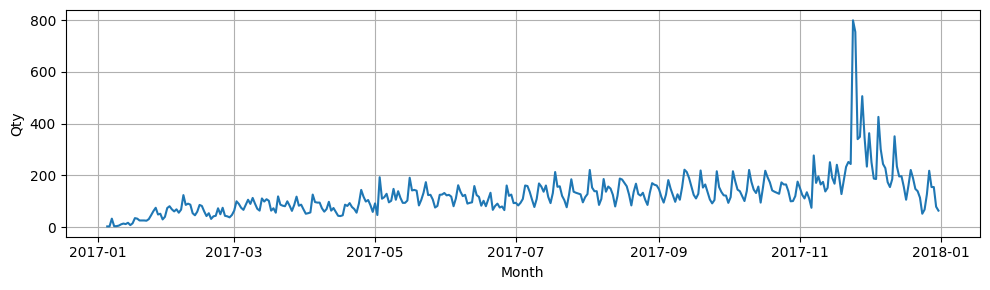

In [ ]:
from operator import index
plt.figure(figsize=(10, 3))  # Ukuran gambar (opsional)
plt.plot('order_approved_at', 'order_id', data=group_order_approved[group_order_approved['year'] == 2017], marker='', linestyle='-')
# plt.title('Grafik Qty terhadap Date')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

### 2018

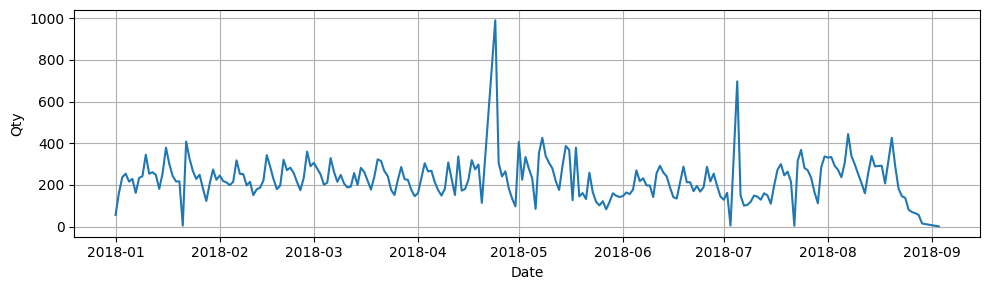

In [ ]:
plt.figure(figsize=(10, 3))  # Ukuran gambar (opsional)
plt.plot('order_approved_at', 'order_id', data=group_order_approved[group_order_approved['year'] == 2018], marker='', linestyle='-')
# plt.title('Grafik Qty terhadap Date')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

### Sept 2016 - Sept 2018

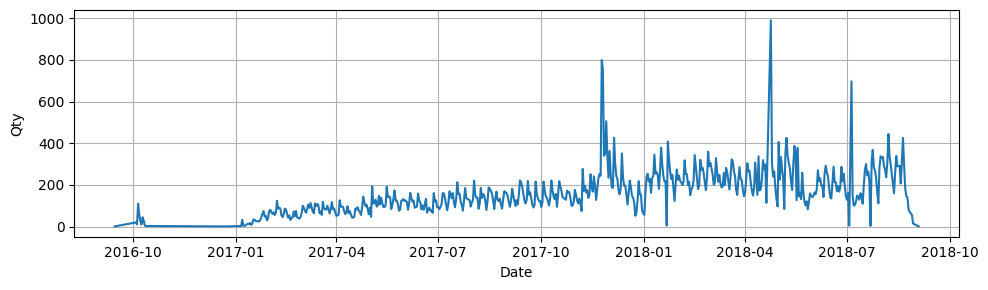

In [ ]:
plt.figure(figsize=(10, 3))  # Ukuran gambar (opsional)
plt.plot('order_approved_at', 'order_id', data=group_order_approved, marker='', linestyle='-')
# plt.title('Grafik Qty terhadap Date')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

## Pertanyaan 4: Bagaimana persebaran customer dan seller?


untuk mengambil peta/map saya mengambil koordinat dari website: https://www.openstreetmap.org/export

### customer

In [ ]:
customer_map_data = pd.merge(customers[['customer_id', 'customer_zip_code_prefix']],
                             geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                             left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns='geolocation_zip_code_prefix')

In [ ]:
BBox = ((customer_map_data.geolocation_lng.min(), customer_map_data.geolocation_lng.max(),
         customer_map_data.geolocation_lat.min(), customer_map_data.geolocation_lat.max()))
BBox

(-72.66670554881472, -8.57785501800488, -36.6053744107061, 42.18400274298598)

In [ ]:
map = plt.imread('map.png')

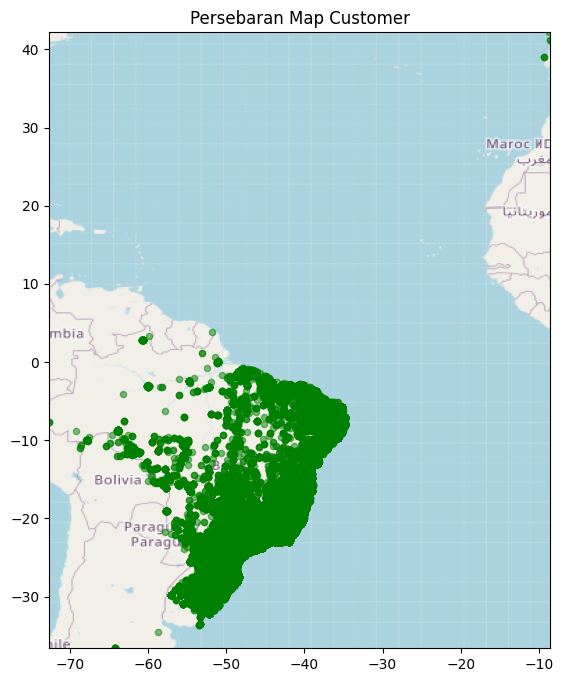

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(customer_map_data.geolocation_lng, customer_map_data.geolocation_lat, zorder=1, alpha= 0.5, c='g', s=20)
ax.set_title('Persebaran Map Customer')
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')

### seller

In [ ]:
sellers_map_data = pd.merge(sellers[['seller_id', 'seller_zip_code_prefix']], geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns='geolocation_zip_code_prefix')

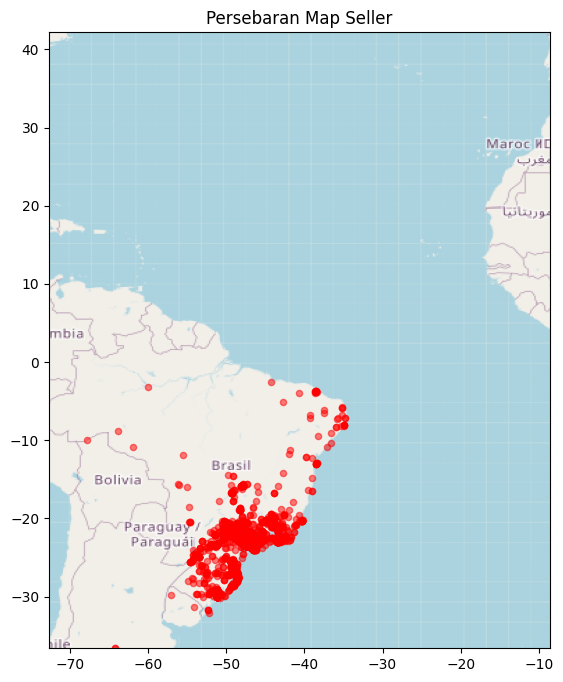

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(sellers_map_data.geolocation_lng, sellers_map_data.geolocation_lat, zorder=1, alpha= 0.5, c='r', s=20)
ax.set_title('Persebaran Map Seller')
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')

## Peranyaan: 5 Kategori product apakah yang memiliki review score tertinggi?

In [ ]:
# mengambil order_status yang deliverd saja, lalu ambil kolom product_id dan review_score
ratings_products = orders[orders.order_status == 'delivered'][['product_id', 'review_score']]

# merge data
rating_product_data = pd.merge(ratings_products, products[['product_id', 'product_category_name_english']], on='product_id', how='left').drop(columns='product_id')

In [ ]:
rating_product_data.isnull().sum()

review_score                      646
product_category_name_english    1378
dtype: int64

In [ ]:
# hapus null value
rating_product_data = rating_product_data.dropna()

In [ ]:
group_rating_product = rating_product_data.groupby('product_category_name_english')['review_score'].mean().reset_index().sort_values(by='review_score', ascending=False).head(5)
group_rating_product

,product_category_name_english,review_score
29,fashion_childrens_clothes,5.000000
11,cds_dvds_musicals,4.666667
52,la_cuisine,4.545455
32,fashion_sport,4.541667
8,books_general_interest,4.539877


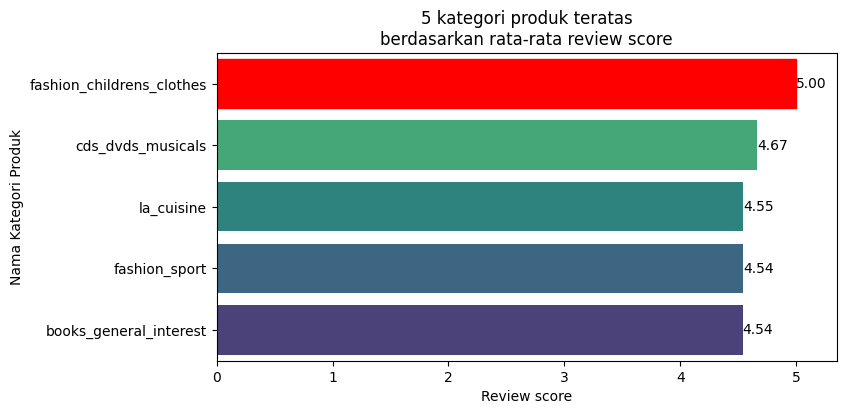

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='review_score', y='product_category_name_english', data=group_rating_product.sort_values(by='review_score', ascending=True), palette='viridis')

# Menambahkan nilai di setiap batang
for i,p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', va='center')

    # Memberikan warna berbeda untuk kategori dengan review_score paling atas
    if i == len(ax.patches) - 1:
      p.set_color('red')  # Atur warna kategori teratas menjadi merah

plt.margins(x=0.07)

# Menambahkan label dan judul
plt.xlabel('Review score')
plt.ylabel('Nama Kategori Produk')
plt.title('5 kategori produk teratas\nberdasarkan rata-rata review score')

# Memutar sumbu y
plt.gca().invert_yaxis()

# Menampilkan plot
plt.show()


# Conclusion

Kategori product apakah yang paling banyak di order secara quantity? (delivered)
- Kategori produk yang terjual dalam hal ini yang sampai ke tangan customer (delivered )adalah kategori bed bath table yaitu sebanyak 9167 unit dan diikutin 9 lainnya.

Tipe payment apa yang paling banyak digunakan?
- Tipe payment yang sering digunakan adalah dengan credit card

Bagaimana tren approved product yang terjual?

- Tren penjualan approved di tahun 2016 terlihat melandai setelah menjulang tinggi setelah bulan Oktober (hanya 4 bulan data).
- Tren penjualan approved di tahun 2017 terlihat perlahan naik dan puncaknya di bulan November dan Desember tetapi setelah mendekati akhir tahun mengalami penurunan yang drastis.
- Tren penjualan approved di tahun 2018 terlihat cukup stabil (data hanya sampai September).

Bagaimana persebaran customer dan seller?
- Persebaran antara seller dan customer terlihat lebih banyak customer, dan rata-rata masih satu kawasan.

Kategori product apakah yang memiliki review score tertinggi?
- Kategori product yang memiliki rata-rata review score tertinggi adalah fashion_childrens_clothes